# Exercises for BDS Miniproject 1 - Data Exploration
Made by group CS-22-DV-4-01.
Fill in the missing parts in order to solve the exercises.

In [30]:
# First we import the libraries and the data set
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

spark = SparkSession.builder.getOrCreate()

path = "babynames1880-2020.csv"

df = spark.read.option("header", True).option("inferSchema", True).csv(path)
df.show()

+----+---------+------+------+----+
|Year|     Name|Gender|Births|Rank|
+----+---------+------+------+----+
|2020|     Liam|     M| 19659|   1|
|2020|     Noah|     M| 18252|   2|
|2020|   Oliver|     M| 14147|   3|
|2020|   Elijah|     M| 13034|   4|
|2020|  William|     M| 12541|   5|
|2020|    James|     M| 12250|   6|
|2020| Benjamin|     M| 12136|   7|
|2020|    Lucas|     M| 11281|   8|
|2020|    Henry|     M| 10705|   9|
|2020|Alexander|     M| 10151|  10|
|2020|    Mason|     M| 10029|  11|
|2020|  Michael|     M|  9717|  12|
|2020|    Ethan|     M|  9464|  13|
|2020|   Daniel|     M|  9419|  14|
|2020|    Jacob|     M|  9196|  15|
|2020|    Logan|     M|  9086|  16|
|2020|  Jackson|     M|  9051|  17|
|2020|     Levi|     M|  9005|  18|
|2020|Sebastian|     M|  8927|  19|
|2020|    Mateo|     M|  8900|  20|
+----+---------+------+------+----+
only showing top 20 rows



Produce a summary of the Year and Births columns in the data frame.

In [ ]:
# missing code here

Now produce a scatter plot matrix grouped by the names Liam and Isabella.

In [31]:
male = df.select("Births", "Name", "Year", "Gender").where(df.Name=="Liam")
female = df.select("Births", "Name", "Year", "Gender").where(df.Name=="Isabella")

gender_df = male.union(female).toPandas()

# missing code here

Produce a bar plot of sum of births in 1920 and sum of births in 2020.

In [32]:
df1 = df.select(['Year','Births']).filter(df.Year == 2020)
df2 = df.select(['Year','Births']).filter(df.Year == 1920)

df1 = df1.groupby('Year').agg(F.sum('Births').alias('Total_births'))
df2 = df2.groupby('Year').agg(F.sum('Births').alias('Total_births'))

dataf = df1.union(df2).toPandas()
dataf = dataf.sort_values('Year')

# missing code here

Produce a pie chart of gender.

In [37]:
# Data to plot
gender_births = df.select("Gender", "Births").groupBy("Gender").sum()
female_value = gender_births.select("sum(Births)").where(gender_births.Gender == "F").collect()[0][0]
male_value = gender_births.select("sum(Births)").where(gender_births.Gender == "M").collect()[0][0]

list = [female_value, male_value]

labels = "Male","Female"
colors = ['blue', 'orange']
explode = (0, 0.1) # explode 1st slice

# missing code here

Produce a box plot and violin plot of the distribution of births for the names Liam and Elijah.

In [33]:
x1 = df.select("Births", "Name").where(df.Name=="Liam")
x2 = df.select("Births", "Name").where(df.Name=="Elijah")

births_df = x1.union(x2).toPandas()

# missing code here

Produce a histogram of Rank of the name Howard.

In [35]:
data = df.select("Rank", "Name").where(df.Name=="Howard")
df_noah = data.toPandas()
bins = np.arange(0, 1000, 100)

# missing code here

Produce a stacked bar plot of births grouped by gender for the years 1920 and 2020.

No handles with labels found to put in legend.


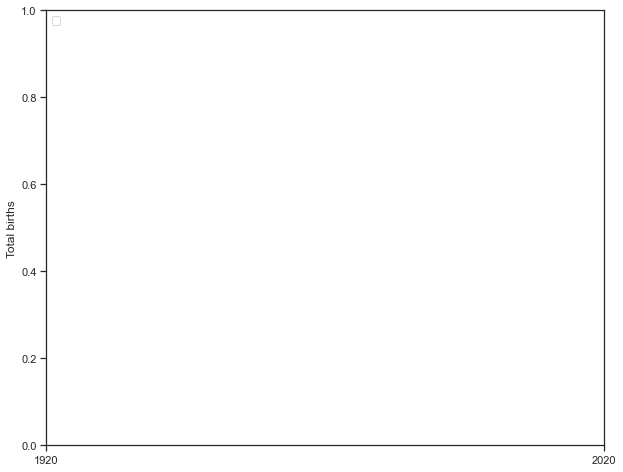

In [36]:
df1 = df.select(['Year','Births', 'Gender']).filter(df.Year == 2020) 
df2 = df.select(['Year','Births', 'Gender']).filter(df.Year == 1920)
df1 = df1.groupby('Year', 'Gender').agg(F.sum('Births').alias('Total_births'))
df2 = df2.groupby('Year', 'Gender').agg(F.sum('Births').alias('Total_births'))

dataf = df1.union(df2).toPandas()
dataf = dataf.sort_values('Year')

male_df = dataf[dataf.Gender == 'M']
female_df = dataf[dataf.Gender == 'F']

labels = male_df['Year']
male = male_df['Total_births']
female = female_df['Total_births']
ind = [x for x, _ in enumerate(labels)]
plt.figure(figsize=(10,8))

# missing code here
plt.xticks(ind, labels)
plt.ylabel("Total births")
plt.legend(loc="upper left")
plt.show()